**Tutorial 8: Simulation**

Part 1: Generating discrete random variables 

What is a "discrete random variable"? It is a number that you generate from a discrete distribution. A distribution (think the normal distribution from statistics) is just a function.

Discrete vs Continuous: For example, the number of fires on each day is DISCRETE (you cannot have 1.5 fires), which means that it is count data. It is not something like time or elevation, which is CONTINUOUS. We use different type of functions to model discrete and continuous processes. For discrete data, we use distributions like the Poisson distribution and the binomial distribution. We use smooth continuous functions for continuous data (give an example and show a normally distributed distribution function) and step functions for discrete data. 

Why would you want to sample numbers from a distribution? It's useful for simulating events, such as fires! 

**Here, we will see how to do this in Python and R.**

In [22]:
%%capture
# First, we need to install the necessary packages. Packages are pre-written 
# code from other people that we can "call" and use ourselves. 

%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install pandas
%pip install distfit
%pip install seaborn 

In [23]:
# Import the packages we installed 

from random import randint
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scipy
import scipy.stats as stats
from scipy.special import gamma
from distfit import distfit
import math
import pandas as pd
import seaborn as sns

In [24]:
# Now, we need to get our data. Our data is located on Quercus under "Python 
# Tutorial", in a text file called "NFDB_point_20210916.txt". This is the 
# text file of the Canadian National Forest Fire Database. Please download this
# data and then upload it to your Google Drive in a folder called "Tutorial8". 

# First, we need to give permission for Google Colab to access our data. You 
# will need to enable all the permissions (there are 8). 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Now, grab the data from Google Drive. 

%cd /content/drive/MyDrive/Tutorial8/

dirname = '/content/drive/MyDrive/Tutorial8/'
fn = 'NFDB_point_20210916.txt' 
df = pd.read_csv(dirname+fn, delimiter = ",")

/content/drive/MyDrive/Tutorial8


(1) Problem 1: Fitting a distribution to the number of fires per day in Canada for 2019

Here is our first problem. Your supervisor has asked you to determine the most likely number of fires tomorrow based on the distribution of fires in 2019 in Canada. Fires are much more likely to occur in the summer so we will focus on the period of June 1 2019 to September 1 2019. They just want you to use a simple mathematical model. Your supervisor has asked you to use the Poisson distribution, which is a type of discrete distribution. 

First, let's do this in Python: 

In [26]:
from scipy.stats import poisson

(1.1) Loading and filtering a Pandas dataframe

Pandas dataframes, denoted using "pd" (because of the way we imported the Pandas library) are useful ways of importing and working with tabular data. Let's look at our dataframe we loaded from Google Drive:

In [27]:
print(df[['REP_DATE','FIRE_ID','SRC_AGENCY','LATITUDE','LONGITUDE','SIZE_HA','CAUSE']].head(20))

               REP_DATE      FIRE_ID SRC_AGENCY  LATITUDE  LONGITUDE  SIZE_HA  \
0   1953-05-26 00:00:00  1953-G00041         BC    59.963   -128.172      8.0   
1   1950-06-22 00:00:00  1950-R00028         BC    59.318   -132.172      8.0   
2   1950-06-04 00:00:00  1950-G00026         BC    59.876   -131.922  12949.9   
3   1951-07-15 00:00:00  1951-R00097         BC    59.760   -132.808    241.1   
4   1952-06-12 00:00:00  1952-G00116         BC    59.434   -126.172      1.2   
5   1951-08-01 00:00:00  1951-R00100         BC    59.963   -136.502    194.2   
6   1952-08-11 00:00:00  1952-G00211         BC    59.597   -126.728      0.6   
7   1950-06-14 00:00:00  1950-G00035         BC    57.463   -122.816   2071.9   
8   1950-06-13 00:00:00  1950-G00039         BC    57.126   -122.762      0.1   
9   1953-05-01 00:00:00  1953-G00043         BC    57.684   -121.925   7834.7   
10  1950-06-22 00:00:00  1950-R00029         BC    59.318   -133.228   5179.9   
11  1950-06-09 00:00:00  195

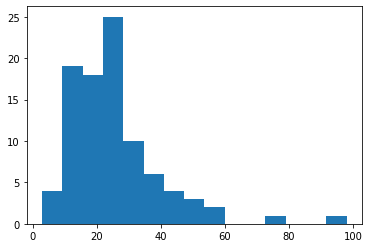

In [28]:
def get_days(year,data):
    year = str(year) 
    data = data[data['YEAR'] == int(year)] #Filter dataframe for year 
    sdate = pd.to_datetime(year+'-06-01').date() #Create date = Jun 1
    edate = pd.to_datetime(year+'-09-01').date() #Create date = Sep 1
    dates = list(pd.date_range(sdate,edate,freq='d')) #Make list of all dates
    #Make sure date is in correct format for filtering dataframe
    dates = [str(input_date)[0:10]+' 00:00:00'for input_date in dates]
    #Initiate empty list 
    num_fires = []
    #Loop through list of dates 
    for date in dates:
        #Is the date in the dataframe? 
        if date in list(set(data['REP_DATE'])): 
          #Filter dataframe for records on date 
          df_date = data[data['REP_DATE'] == date]
          #Get the number of times record occurs and append to list
          num_fires.append(len(df_date))
        else: 
          #If the date isn't there, no fires occurred, so append 0 to list
          num_fires.append(0)
    #Return the list from the function
    return num_fires

#Using our function 
num_pd = get_days(2019,df)

#Visualize the dataframe in a histogram 
plt.hist(num_pd,bins=15)
plt.show()

(1.3) Now, we need to fit a Poisson distribution. This is NOT fit to the histogram. It is fit to the data itself. The distribution is fit using only one parameter: the mean of the data itself.

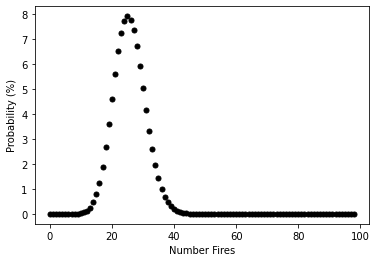

In [29]:
# Create an array of X values (which plot on X axis)
# Should start at 0 (can't have less than 0 fires)
# Should end at the maximum number of fires seen in 2019 
X = np.arange(0,np.nanmax(num_pd)+1)

# Poisson parameter is just the mean of the data 
par = np.nanmean(num_pd)
plt.plot(X, poisson.pmf(X, par)*100, 'ko', markersize=5) 
plt.xlabel('Number Fires')
plt.ylabel('Probability (%)')
plt.show() 

(1.4) We have created the simple mathematical Poisson distribution model for the number of fires on each day. Now, we will use the pmf (probability mass function) to determine the % chance of X number of fires tomorrow.

In [30]:
# What is the probability of a specific number of fires? 

y = stats.poisson.pmf(10, par)
print(round(y*100,2)) # 0.03% chance of 10 fires

y = stats.poisson.pmf(15, par)
print(round(y*100,2)) # 0.78 % chance of 15 fires

y = stats.poisson.pmf(20, par)
print(round(y*100,2)) # 4.61 % chance of 20 fires

0.03
0.78
4.61


(1.5) This information is not incredibly useful because you it's just for specifically 10, 15 fires, etc., and not a range of fire numbers. Let's check probabilities for less than a certain number of fires occurring. This can gives us an idea of upper and lower bounds for fire numbers. We can do this using the cumulative distribution function (cdf).

In [31]:
y = poisson.cdf(10, par)
print(round(y*100,2)) # 0.04 % chance of <= 10 fires

y = poisson.cdf(15, par)
print(round(y*100,2)) # 1.73 % chance of <= 15 fires

y = poisson.cdf(20, par)
print(round(y*100,2)) # 15.76 % chance of <= 20 fires 

0.04
1.73
15.76


(1.6) Using a probability distribution to get the likelihood of an event (that next year X fires will happen tomorrow in Canada)

But your supervisor asked you to get the most likely number of fires occurring on any given day (e.g. tomorrow). We haven't done that yet! It is the "top" of the probability mass function.

In [32]:
test_numbers = np.arange(0,np.nanmax(num_pd)+1)
par = np.nanmean(num_pd)
probabilities = poisson.pmf(test_numbers, par)
max_prob = list(probabilities).index(np.nanmax(probabilities))
most_prob_numf = test_numbers[max_prob]
percent = probabilities[max_prob]
print('The most probable number of fires is: %s with a probability of %s percent'
%(most_prob_numf, round(percent*100)))

The most probable number of fires is: 25 with a probability of 8 percent


That corresponds well to the probability mass function plotted above. Our answer to the supervisor is that it is most likely that there will be 25 fires in Canada tomorrow, but that they should be skeptical of this estimate because it does not take into account factors such as weather and spatial variation across Canada. 

(2) Now, let's see how to do this in R: 

In [33]:
%%capture
#Set up the Colab Notebook for R

%load_ext rpy2.ipython 

(2.1) Making the histogram: 

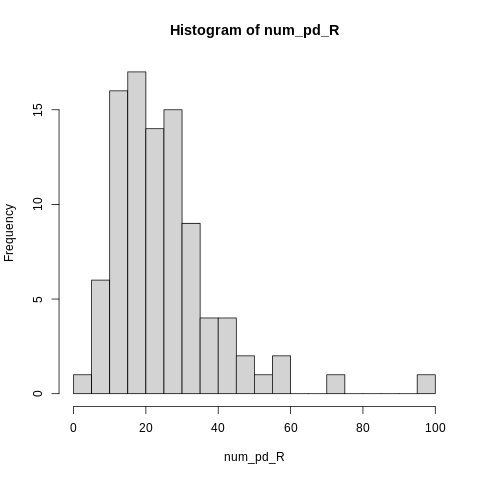

In [34]:
%%R

#The cells do not communicate well between R and Python. Here is just the number of fires
#on each day (num_pd) from above
num_pd_R <-  c(35, 31, 17, 20, 22, 13, 19, 28, 26, 15, 8, 18, 48, 32, 28, 29, 33, 26, 27, 
        23, 27, 26, 21, 22, 30, 33, 20, 11, 15, 42, 45, 25, 15, 13, 19, 22, 28, 29, 
        17, 25, 20, 14, 17, 28, 14, 42, 37, 59, 50, 34, 33, 38, 59, 98, 35, 24, 51, 
        28, 19, 26, 17, 37, 41, 32, 40, 74, 23, 26, 16, 15, 22, 19, 22, 15, 20, 23, 
        10, 14, 18, 14, 18, 23, 12, 9, 10, 23, 12, 15, 17, 7, 3, 10, 12)

hist(num_pd_R, breaks = 15)

(2.2) Fit a Poisson distribution: 

In [35]:
%%R
num_pd_R <-  c(35, 31, 17, 20, 22, 13, 19, 28, 26, 15, 8, 18, 48, 32, 28, 29, 33, 26, 27, 
        23, 27, 26, 21, 22, 30, 33, 20, 11, 15, 42, 45, 25, 15, 13, 19, 22, 28, 29, 
        17, 25, 20, 14, 17, 28, 14, 42, 37, 59, 50, 34, 33, 38, 59, 98, 35, 24, 51, 
        28, 19, 26, 17, 37, 41, 32, 40, 74, 23, 26, 16, 15, 22, 19, 22, 15, 20, 23, 
        10, 14, 18, 14, 18, 23, 12, 9, 10, 23, 12, 15, 17, 7, 3, 10, 12)
library(MASS)
pmf<-fitdistr(num_pd_R, densfun="poisson")
print(pmf[1]) # This is the Poisson parameter 

$estimate
  lambda 
25.56989 



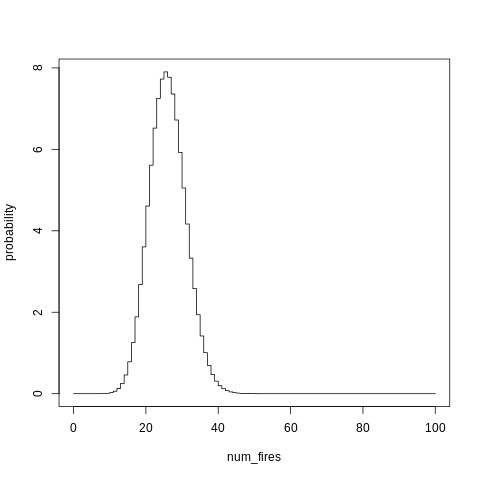

In [36]:
%%R
eq <- function(x){dpois(x, lambda=25.56989)*100}
num_fires <- seq(from = 0, to = 100, by = 1)
probability <- eq(test_num)
plot(probability ~ num_fires, type = "s")

(2.3) We have created the simple mathematical Poisson distribution model for the number of fires on each day in R. Now, we will use the pmf (probability mass function) to determine the % chance of X number of fires tomorrow. We see that our answer is the same as we got using Python: 

In [37]:
%%R

calc_pmf <- function(x){dpois(x, lambda=25.56989)*100}

print(calc_pmf(10)) #Probability of 10 fires
print(calc_pmf(15))
print(calc_pmf(20))

[1] 0.02586208
[1] 0.7844606
[1] 4.608827


(1.5) Now, let's create the cumulative distribution function (cdf) in R. We also get the same answers as Python. 

In [38]:
%%R

calc_cdf <- function(x){ppois(x, lambda=25.56989)*100}

print(calc_cdf(10)) # Chance of <= 10 fires
print(calc_cdf(15))
print(calc_cdf(20))

[1] 0.04104306
[1] 1.725867
[1] 15.75754


(1.6) How do we calculate the most likely number of fires tomorrow in R? 

In [39]:
%%R
eq <- function(x){dpois(x, lambda=25.56989)*100}
test_num <- seq(from = 0, to = 100, by = 1)
initialize <- seq(0,0,length.out=101)
for(i in test_num){
    y <- eq(i)
    initialize[i] = y
}
print(max(initialize))
print(which(initialize == max(initialize)))

[1] 7.901575
[1] 25


Same as Python, as it should be!

(3) Now, what if we want to simulate number of fires on a given day? 

(3.1) Generate a pseudo-random number

In [40]:
def gen_rand():
    '''
    Use random's randint to generate a pseudo-random integer between 0-99
    Parameters
    ----------
    Returns
    ----------
    int
        a pseudo-random integer
    '''
    return randint(0,99)

gen_rand()

39

(3.2) As discussed in the lecture, we can use this to simulate the number of fires on a given day. NumPy in Python has a built-in function to do this for us, so you do not actually have to use our special random number generator. 

In [41]:
rng = np.random.default_rng()
num_fires = rng.poisson(lam=par, size=1000)
print(num_fires)

[32 22 27 24 32 25 23 26 21 29 29 26 28 19 28 19 31 29 22 17 20 30 30 19
 25 22 17 23 26 37 31 13 17 32 21 25 26 22 16 29 28 26 24 19 26 31 24 22
 21 27 22 19 24 33 42 19 26 26 24 20 27 25 26 22 28 24 28 33 25 27 21 27
 26 30 29 33 27 29 29 26 29 33 16 27 25 27 29 25 25 31 26 24 27 19 23 21
 27 20 26 26 16 26 27 28 26 29 33 28 27 30 30 29 20 29 27 31 34 20 33 21
 27 23 30 28 24 22 32 24 35 20 22 22 27 24 31 26 14 21 28 33 25 25 28 17
 34 25 21 19 25 29 22 30 27 30 25 26 23 22 24 35 23 29 28 22 30 26 23 41
 27 26 27 24 26 31 33 26 26 20 29 26 26 19 25 26 16 26 31 26 26 33 20 28
 15 29 29 33 23 32 22 19 23 33 16 32 27 29 22 35 19 28 29 35 29 15 28 30
 25 28 32 21 27 24 27 24 19 30 25 34 26 23 26 17 18 22 21 30 31 28 28 25
 33 21 24 29 19 27 18 24 27 22 23 24 27 27 28 25 22 25 21 23 20 23 19 26
 25 27 28 33 25 19 24 28 39 27 13 30 27 29 30 22 23 25 26 16 22 27 34 37
 20 23 28 27 29 23 21 25 36 28 25 21 23 18 34 20 23 23 24 31 28 33 25 20
 24 24 24 17 20 21 21 29 24 17 21 26 22 25 27 32 31

What does this look like? 

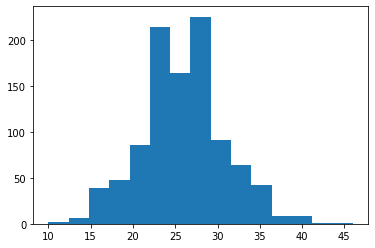

In [42]:
plt.hist(num_fires,bins=15)
plt.show()

(4) How would we do this in R? 

(4.1) Now, generate a pseudo-random number in R: 

In [43]:
%%R
floor(runif(1, min=0, max=101))

[1] 43


(4.2)  Using R to simulate the number of fires on a given day.

In [44]:
%%R
r_fire_num = rpois(1000,25.56989)

What does it look like? 

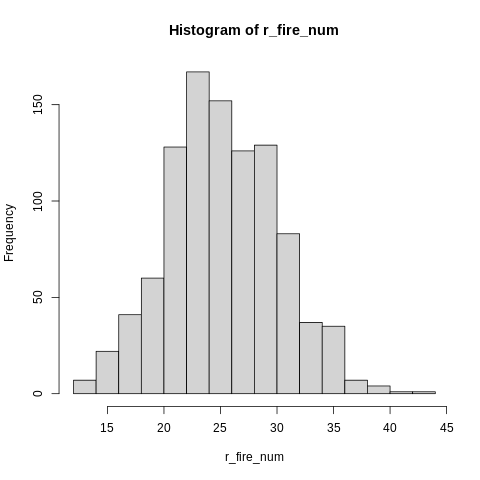

In [45]:
%%R
hist(r_fire_num, breaks = 15)

**Tutorial 8: Simulation**

Part 2: Generating continuous random variables 

(5) Your supervisor has a new problem for you. They want to know the most likely amount of land that will burn in Ontario in the months of June, July, and August based on historical area burned data.

First, we need to get our data! Let's make a function to save us time.

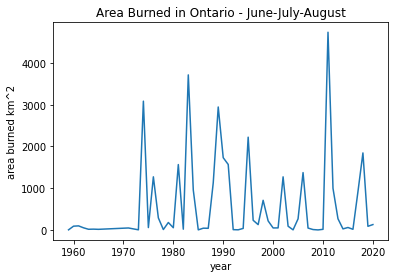

In [46]:
def get_area_burned(month, province): 
  years = [] 
  areab = [] 
  df_province = df[df['SRC_AGENCY']=='ON']
  df_month = df_province[df_province['MONTH'].isin(month)]
  for year in list(set(df_month['YEAR'])): 
    df_year = df_month[df_month['YEAR']==year]
    total_area_burned = sum(df_year['SIZE_HA'])/100 #Convert to km
    years.append(year)
    areab.append(total_area_burned)
  return years, areab

year_list,area_list = get_area_burned([7,8,9],'ON')
plt.plot(year_list,area_list)
plt.title('Area Burned in Ontario - June-July-August')
plt.xlabel('year')
plt.ylabel('area burned km^2')
plt.show()

Now that we have our data, we can move on to solving our problem. There are multiple ways to do this. Why not fit a distribution, similar to before? It will be a continuous distribution instead of a discrete one, because area burned is not count data. A test for this is whether area burned can have a decimal. Obviously it can - a fire can burn 4.5 km^2. 

Let's fit a distribution: 

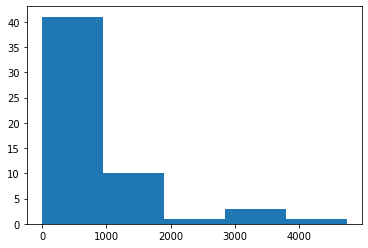

In [47]:
# First, let's take a look at the histogram. 

plt.hist(area_list, bins=5)
plt.show()

(5.1) Fitting a continuous probability distribution

Looks familiar, but we cannot use Poisson here... we need to fit a continuous distribution. Different distributions have different parameters (which are used to fit them to the data), such as their mean and standard deviation. These control how the distribution looks. They are calculated differently for different continuous distributions. Wikipedia is a great resource for how this is done. You can find the information on the Wikipedia page of the distribution. Here, we will do this for the Exponential distribution. 

In [48]:
# First, create functions to calculate the parameters of the distribution.

def calc_mean_exp(rate):
    '''
    Calculate mean of fitted exponential distribution
    Method from: https://en.wikipedia.org/wiki/Exponential_distribution
    Parameters
    ----------
    rate : float
        rate parameter, 1/scale (as stated on Wikipedia page)
    Returns
    ----------
    float
        mean
    '''

    mean = 1/rate

    return mean

def calc_stdev_exp(rate):
    '''
    Calculate stdev of fitted exponential distribution
    Method from: https://en.wikipedia.org/wiki/Exponential_distribution
    Parameters
    ----------
    rate : float
        rate parameter, 1/scale (as stated on Wikipedia page)
    Returns
    ----------
    float
        stdev
    '''

    var = 1/np.power(rate,2)
    stdev = math.sqrt(var)

    return stdev

In [49]:
def get_distribution(data):
    '''
    Fit the theoretical distributions
    Method from: https://erdogant.github.io/distfit/pages/html/Performance.html#probability-density-function-fitting
    Parameters
    ----------
    data : list
        list of the data we want to fit distribution for
    Returns
    ----------
    dict
        dictionary containing information about each tested distribution 
    '''

    mean = sum(list(data))/len(list(data))
    stdev = math.sqrt(stats.describe(data)[3])
    dict_distributions = {} 
    dict_distributions['actual data'] = [0,mean,stdev]

    #Exponential

    dist = distfit(distr='expon')
    dist.fit_transform(np.array(data))

    scale = dist.model['scale']
    shape = dist.model['loc']
    rss = dist.model['score']
    m = calc_mean_exp(1/scale) #rate = inverse scale
    sd = calc_stdev_exp(1/scale)

    dict_distributions['exponential'] = [rss,m,sd]

    return dict_distributions

get_distribution(area_list)

[distfit] >fit..
[distfit] >transform..
[distfit] >[expon] [0.00 sec] [RSS: 0.0000205] [loc=0.492 scale=620.635]
[distfit] >Compute confidence interval [parametric]


{'actual data': [0, 621.1272500278816, 1036.7404192077076],
 'exponential': [2.0535497974080776e-05, 620.6352500245738, 620.6352500245738]}

(5.2) Let's visualize this: 

[distfit] >fit..
[distfit] >transform..
[distfit] >[expon] [0.00 sec] [RSS: 0.0000205] [loc=0.492 scale=620.635]
[distfit] >Compute confidence interval [parametric]


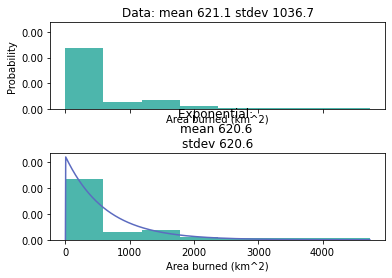

In [50]:
def plot_hist_and_distributions(data):
    '''
    Make the graph of the different theoretical distributions
    Information from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html
    & https://stackoverflow.com/questions/33811353/histogram-fitting-with-python
    Parameters
    ----------
    data : list
        list of area burned data
    '''
    idict = get_distribution(data)

    data = np.array(data)
    
    fig, ax = plt.subplots(2, sharey=True,sharex=True)
    plt.rcParams['figure.figsize'] = [15,10]

    ax[0].hist(data, density=True, bins=8,color='#4DB6AC')  # density=False would make counts
    ax[0].set_ylabel('Probability')
    ax[0].set_xlabel('Area burned (km^2)')
    m1 = round(idict['actual data'][1],1)
    s1 = round(idict['actual data'][2],1)
    ax[0].set_title('Data: mean %s stdev %s'%(m1,s1))
    ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


    ax[1].hist(data, density=True, bins=8,color='#4DB6AC')  # density=False would make counts
    x = np.linspace(0,np.max(data), 1000)
    mod = stats.expon.fit(data)
    y = stats.expon.pdf(x, *mod)
    ax[1].plot(x,y,color='#5C6BC0')

    ax[1].set_xlabel('Area burned (km^2)')
    m1 = round(idict['exponential'][1],1)
    s1 = round(idict['exponential'][2],1)
    
    ax[1].set_title('Exponential: \nmean %s \nstdev %s'%(m1,s1))

    ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    fig.subplots_adjust(hspace=.5)
    plt.show()

plot_hist_and_distributions(area_list)

The distribution is an approximation of the real data. 

(5.2) How do we sample numbers from the distribution we've fit? Easy! Same as we've done before. 

In [51]:
random_sample = [round(x, 2) for x in np.random.exponential(620.6352500245738, size=1000)]
print(random_sample)

[1414.67, 415.04, 327.68, 1122.37, 519.07, 234.86, 499.57, 704.43, 480.56, 1070.04, 214.48, 346.38, 729.76, 247.39, 1205.07, 980.54, 307.86, 645.59, 213.25, 3763.49, 906.87, 1213.83, 38.94, 59.22, 2710.23, 38.1, 688.27, 495.58, 1000.39, 2349.93, 1427.66, 2694.88, 199.18, 844.56, 113.16, 338.38, 1227.55, 2443.49, 423.11, 6.51, 1221.44, 1647.64, 88.65, 286.2, 338.15, 54.32, 436.78, 1198.63, 608.64, 1131.01, 1.13, 14.3, 1476.08, 230.22, 2063.9, 888.42, 303.93, 399.67, 95.86, 1056.82, 812.54, 277.59, 406.06, 1613.05, 229.87, 505.46, 2244.4, 242.77, 62.19, 1460.07, 162.09, 121.15, 527.15, 495.81, 763.9, 382.8, 835.6, 403.86, 1086.42, 1023.81, 303.88, 13.3, 180.3, 687.69, 774.97, 873.21, 177.12, 102.14, 6.26, 891.82, 251.98, 147.12, 604.58, 595.19, 550.32, 447.65, 2.46, 476.62, 208.9, 805.23, 303.03, 1198.16, 1019.66, 132.19, 12.5, 785.25, 2863.18, 719.87, 587.29, 195.47, 1049.83, 638.51, 1541.9, 793.54, 1035.61, 1322.52, 138.24, 682.5, 1301.03, 806.08, 221.42, 312.17, 102.2, 1481.52, 101.85

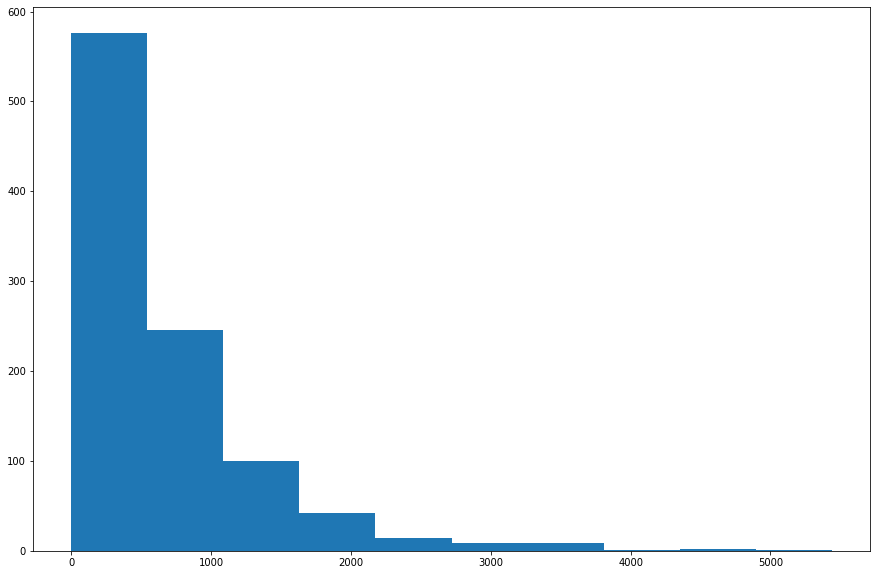

In [52]:
plt.hist(random_sample)
plt.show()

In [53]:
print(area_list)

[2.39, 90.09, 97.43, 51.22, 16.03, 18.99, 14.57, 47.04, 3.04, 3083.94, 56.65, 1272.2350002794656, 288.2340000357767, 9.494000024154134, 178.07500009323593, 52.79300001715081, 1565.6700001368652, 18.06500006179487, 3713.2090002170617, 955.4990000479664, 2.280000026076287, 41.85300000138578, 39.3610000194005, 1128.601000048814, 2944.4760000331235, 1730.253000027834, 1568.394000038979, 7.017000003605922, 3.1200000090893947, 36.38300000259266, 2221.6100000178208, 231.2430000115927, 126.96800003044174, 709.5690000281469, 216.67900001212908, 47.55700000874667, 48.81500002747593, 1271.5990000246304, 89.26400001324677, 2.1910000047084037, 265.86100001181507, 1373.2470000674552, 44.85900002169566, 9.300000002622403, 0.49200000330792065, 14.687000005543162, 4734.622000031454, 996.4670000256136, 267.57999999828604, 25.170000003203494, 58.51600001543674, 15.444000019058272, 914.9369999852763, 1844.386000055223, 86.97000001206939, 128.69100000000003]


(6) Let's do this in R! First, we calculate the mean of the area burned data: 

❕ As a note here, we need to re-define area_list below because the Python and R cells of the Colab notebook do not communicate. 

In [54]:
%%R
area_list_r <- c(2.39, 90.09, 97.43, 51.22, 16.03, 18.99, 14.57, 47.04, 3.04, 3083.94, 56.65, 1272.2350002794656, 288.2340000357767, 9.494000024154134, 178.07500009323593, 52.79300001715081, 1565.6700001368652, 18.06500006179487, 3713.2090002170617, 955.4990000479664, 2.280000026076287, 41.85300000138578, 39.3610000194005, 1128.601000048814, 2944.4760000331235, 1730.253000027834, 1568.394000038979, 7.017000003605922, 3.1200000090893947, 36.38300000259266, 2221.6100000178208, 231.2430000115927, 126.96800003044174, 709.5690000281469, 216.67900001212908, 47.55700000874667, 48.81500002747593, 1271.5990000246304, 89.26400001324677, 2.1910000047084037, 265.86100001181507, 1373.2470000674552, 44.85900002169566, 9.300000002622403, 0.49200000330792065, 14.687000005543162, 4734.622000031454, 996.4670000256136, 267.57999999828604, 25.170000003203494, 58.51600001543674, 15.444000019058272, 914.9369999852763, 1844.386000055223, 86.97000001206939, 128.69100000000003)
fitted_parameters <- fitdistr(area_list_r, "exponential") 
print(fitted_parameters[1])

$estimate
       rate 
0.001609976 



(6.1) Now that we have rate, we calculate the mean (same as standard deviation) as: 

In [55]:
%%R
mean <- 1/0.001609976 
print(mean)

[1] 621.1273


Same as Python, as expected!

(6.2) Let's sample 1000 values from the fitted exponential distribution: 

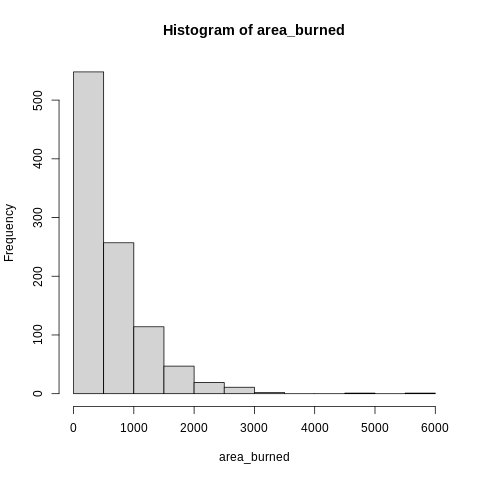

In [56]:
%%R
area_burned <- rexp(1000, 1/621.1273)
hist(area_burned)